# Budget Analysis

---

## Environment Setup

In [141]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [142]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [143]:
# Set environment variables from the .env file
load_dotenv()

True

In [144]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = '5ebb39d5abaad500126289f0'
PLAID_PUBLIC_KEY = '2cf4432143b5c1347d73eb8b472abe'
PLAID_SECRET_KEY = '9aae4947269275e12b2d4e1ea22836'

In [145]:
PLAID_PUBLIC_KEY

'2cf4432143b5c1347d73eb8b472abe'

In [146]:
PLAID_SECRET_KEY

'9aae4947269275e12b2d4e1ea22836'

In [147]:
PLAID_CLIENT_ID

'5ebb39d5abaad500126289f0'

---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [148]:
# Create the client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment="sandbox")

In [149]:
# Create client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET_KEY, public_key=PLAID_PUBLIC_KEY, environment='sandbox')


In [157]:
# Set the institution id
INSITUTION_ID = "ins_109508"

### 2. Generate a public token

In [158]:
# Create the public token
create_tkn_response = client.Sandbox.public_token.create(INSITUTION_ID, ['transactions','income','assets'])

### 3. Exchange the public token for an access token

In [159]:
# Retrieve the access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

In [160]:
# Store the access token in a Python variable
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [161]:
# Retrieve accounts
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'k9RlwrMExbfa34PNKGxMS5BQaV33qMTWK78q1',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'lvRk7zmE9WF13naPvxdDH3XldnNNA7iZ8BrnB',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'qr63laJwbXfmMG5rdXJosK4eMx55oLudklVLP',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [163]:
# Set the start and end date 90 days from today
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Retrieve the transactions for the last 90 days
transaction_response = client.Transactions.get(access_token,start_date,end_date)
transactions = transaction_response['transactions']

# Print the transactions
print(transactions)

[{'account_id': 'KqLoRrAk4aUKRdgDMvzqSZKyzBEE7XtVbomKp', 'account_owner': None, 'amount': 500, 'authorized_date': None, 'category': ['Food and Drink', 'Restaurants'], 'category_id': '13005000', 'date': '2020-05-25', 'iso_currency_code': 'USD', 'location': {'address': None, 'city': None, 'country': None, 'lat': None, 'lon': None, 'postal_code': None, 'region': None, 'store_number': None}, 'name': 'Tectra Inc', 'payment_channel': 'in store', 'payment_meta': {'by_order_of': None, 'payee': None, 'payer': None, 'payment_method': None, 'payment_processor': None, 'ppd_id': None, 'reason': None, 'reference_number': None}, 'pending': False, 'pending_transaction_id': None, 'transaction_code': None, 'transaction_id': 'oq6zbk1EJXUNnagq3LmkSeXKxaB9rruXLaAlk', 'transaction_type': 'place', 'unofficial_currency_code': None}, {'account_id': 'KqLoRrAk4aUKRdgDMvzqSZKyzBEE7XtVbomKp', 'account_owner': None, 'amount': 2078.5, 'authorized_date': None, 'category': ['Payment'], 'category_id': '16000000', 'date

### 2. Print the categories for each transaction

In [165]:
# Create a for-loop to print the categories for each transaction
for transaction in transactions:
    print(transaction["category"])

['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']
['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Avi

### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [166]:
transactions_df = pd.DataFrame(columns=["Date", "Name", "Amount", "Category"])
dates, names, amounts, cats = [],[],[],[]
for transaction in transactions:
    dates.append(transaction["date"])
    names.append(transaction["name"])
    amounts.append(float(transaction["amount"]))
    cats.append(transaction["category"][0])
transactions_df["Date"] = dates
transactions_df["Name"] = names
transactions_df["Amount"] = amounts
transactions_df["Category"] = cats
transactions_df.tail()

,Date,Name,Amount,Category
43,2020-03-13,Starbucks,4.33,Food and Drink
44,2020-03-12,SparkFun,89.40,Food and Drink
45,2020-03-11,INTRST PYMNT,-4.22,Transfer
46,2020-03-01,United Airlines,500.00,Travel
47,2020-02-28,Uber,6.33,Travel


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [177]:
transactions_df.set_index(pd.DatetimeIndex(transactions_df["Date"]), inplace = True)
transactions_df.head()
transactions_df.drop(columns = ["Date"], inplace = True)
transactions_df.tail()

KeyError: 'Date'

---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [170]:
income_response = client.Income.get(access_token)
# income_respose
print(income_response['income'])

last_year_gross_income = income_response["income"]["last_year_income_before_tax"]
print(f"Last years gross income was: ${last_year_gross_income}")

monthly_income = income_response["income"]["income_streams"][0]["monthly_income"]
print(f"Monthly income is: ${monthly_income}")

projected_yearly_income = income_response["income"]["projected_yearly_income"]
print(f"Projected yearly income is: ${projected_yearly_income}")

{'income_streams': [{'confidence': 0.99, 'days': 690, 'monthly_income': 500, 'name': 'UNITED AIRLINES'}], 'last_year_income': 6000, 'last_year_income_before_tax': 7285, 'max_number_of_overlapping_income_streams': 1, 'number_of_income_streams': 1, 'projected_yearly_income': 6085, 'projected_yearly_income_before_tax': 7389}
Last years gross income was: $7285
Monthly income is: $500
Projected yearly income is: $6085


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [172]:
expenses_by_cat = transactions_df.groupby('Category').sum()
expenses_by_cat

,Amount
Category,
Food and Drink,3317.19
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20537.34
Travel,35.19


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002E9AB149BC8>],
      dtype=object)

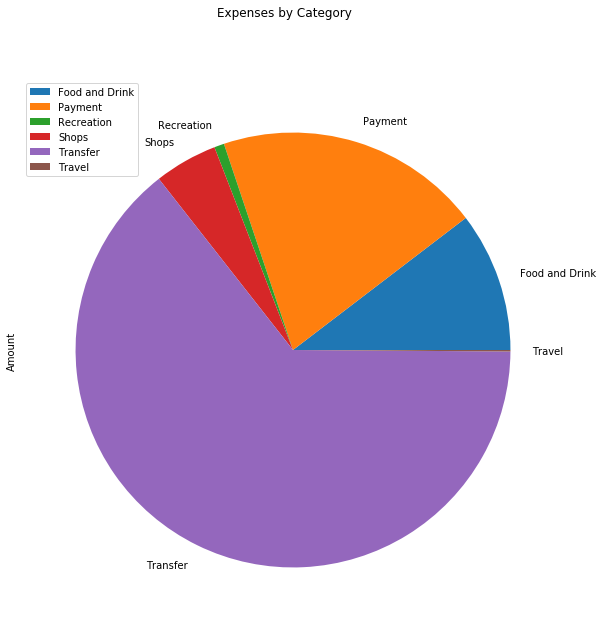

In [175]:
expenses_by_cat.plot(kind = "pie", subplots = True, title = "Expenses by Category", figsize = (10,10))
